# 1 – Import Required Libraries 🛠️

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


# 📂 2 – Load Dataset 📑

In [2]:
df = pd.read_csv("sentimentdataset.csv")
df.head(3)


,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15


# 📐 3 – Dataset Shape 🔢

In [3]:
df.shape

(732, 15)

# 🧾 4 – Dataset Information 🧠

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  732 non-null    int64  
 1   Unnamed: 0    732 non-null    int64  
 2   Text          732 non-null    object 
 3   Sentiment     732 non-null    object 
 4   Timestamp     732 non-null    object 
 5   User          732 non-null    object 
 6   Platform      732 non-null    object 
 7   Hashtags      732 non-null    object 
 8   Retweets      732 non-null    float64
 9   Likes         732 non-null    float64
 10  Country       732 non-null    object 
 11  Year          732 non-null    int64  
 12  Month         732 non-null    int64  
 13  Day           732 non-null    int64  
 14  Hour          732 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 85.9+ KB


# 🏷️ 5 – Column Names 📋

In [6]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Text', 'Sentiment', 'Timestamp', 'User',
       'Platform', 'Hashtags', 'Retweets', 'Likes', 'Country', 'Year', 'Month',
       'Day', 'Hour'],
      dtype='object')

# 6 – Missing Values Check 🔍

In [10]:
df.isnull().sum()

Unnamed: 0.1    0
Unnamed: 0      0
Text            0
Sentiment       0
Timestamp       0
User            0
Platform        0
Hashtags        0
Retweets        0
Likes           0
Country         0
Year            0
Month           0
Day             0
Hour            0
dtype: int64

# 7 – Sentiment Count Analysis

In [12]:
df["Sentiment"].value_counts()



Sentiment
Positive               44
Joy                    42
Excitement             32
Happy                  14
Neutral                14
                       ..
Vibrancy                1
Culinary Adventure      1
Mesmerizing             1
Thrilling Journey       1
Winter Magic            1
Name: count, Length: 279, dtype: int64

# 8 – Sentiment Distribution Visualization 📈

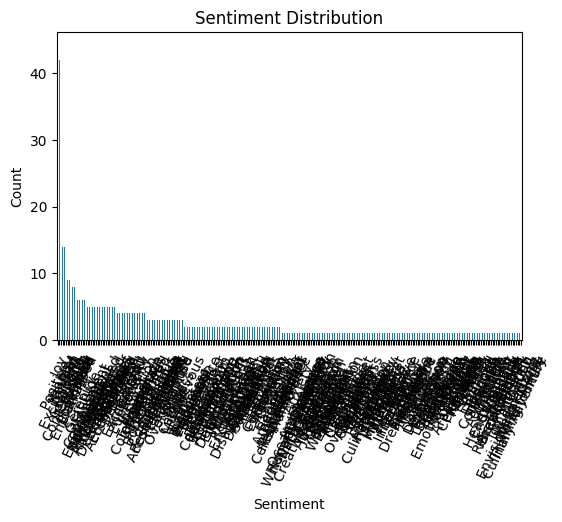

In [35]:
plt.figure(figsize=(6,4))
df["Sentiment"].value_counts().plot(kind="bar")
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.xticks(rotation =65)
plt.show()


# 9 – Text Length Feature Engineering 🧪

In [18]:
df["text_length"] = df["Text"].apply(len)
df.head()


,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour,text_length
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12,52
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8,52
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15,51
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18,52
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19,52


# 10 – Text Length Distribution 📉

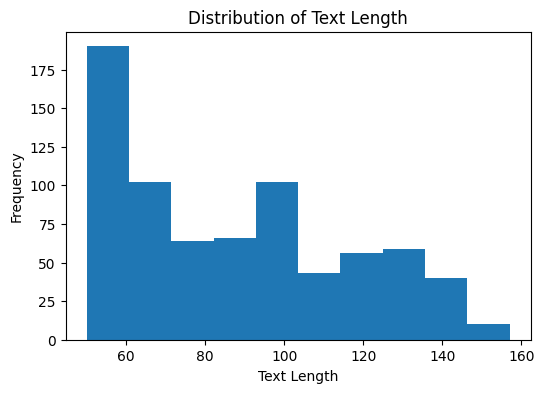

In [20]:
plt.figure(figsize=(6,4))
plt.hist(df["text_length"])
plt.title("Distribution of Text Length")
plt.xlabel("Text Length")
plt.ylabel("Frequency")
plt.show()



# 11 – Avg Text Length by Sentiment 📊

In [21]:
df.groupby("Sentiment")["text_length"].mean()


Sentiment
Acceptance           57.000000
Acceptance           88.200000
Accomplishment       83.666667
Admiration          134.000000
Admiration           58.000000
                       ...    
Wonder               71.000000
Wonder               68.000000
Wonderment           65.000000
Yearning            119.000000
Zest                109.000000
Name: text_length, Length: 279, dtype: float64

# 12 – Avg Text Length Visualization 🎨

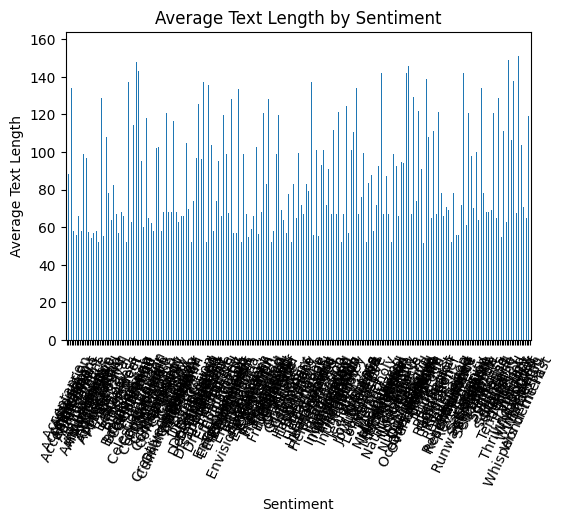

In [33]:
plt.figure(figsize=(6,4))
df.groupby("Sentiment")["text_length"].mean().plot(kind="bar")
plt.title("Average Text Length by Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Average Text Length")
plt.xticks(rotation =65)
plt.show()





# 13 Positive Text Samples 💚

In [37]:
df[df["Sentiment"]=="positive"]["Text"].head(5)


Series([], Name: Text, dtype: object)

# 14 – Negative Text Samples 🔴

In [38]:
df[df["Sentiment"]=="negative"]["Text"].head(5)


Series([], Name: Text, dtype: object)

# 15 Neutral Text Samples ⚪

In [39]:
df[df["Sentiment"]=="neutral"]["Text"].head(5)


Series([], Name: Text, dtype: object)

# 16 Longest Text Records 🧵

In [40]:
df.sort_values("text_length", ascending=False).head(5)


,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour,text_length
631,632,636,"Embarked on a hiking adventure, conquering tra...",Excitement,2023-07-10 14:20:00,SeniorHikerExplorer,Instagram,#NatureTrailBlazer #SeniorExplorer,28.0,55.0,UK,2023,7,10,14,157
619,620,624,"Joined a nature photography club, capturing th...",Joy,2023-06-28 22:15:00,NaturePhotographySenior,Facebook,#OutdoorBeauty #SeniorClicks,18.0,35.0,UK,2023,6,28,22,156
572,573,577,"As the first snowflake descends, the winter en...",Winter Magic,2022-12-01 17:45:00,SnowLoverWinterEnthusiast,Facebook,#WinterMagic #SnowyLandscapes,30.0,60.0,Canada,2022,12,1,17,156
639,640,644,"Attended a local jazz festival, tapping toes t...",Joy,2023-07-18 16:30:00,SeniorJazzFestivalGoer,Facebook,#TimelessTunes #SeniorJazz,25.0,50.0,USA,2023,7,18,16,155
579,580,584,Exploring the historical architecture of an an...,Whispers of the Past,2019-04-18 20:30:00,HistoryExplorerAncientCityTour,Twitter,#WhispersOfThePast #HistoricalTour,35.0,70.0,Greece,2019,4,18,20,151


# 17 – Shortest Text Records ✨

In [41]:
df.sort_values("text_length").head(5)


,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour,text_length
50,51,52,Starting a new fitness challenge tomorrow! 💪 ...,Positive,2023-02-01 08:00:00,FitnessChallenge,Facebook,#FitnessChallenge #NewBeginnings,22.0,45.0,UK,2023,2,1,8,50
41,42,43,Celebrating a friend's birthday tonight! 🎂 ...,Positive,2023-01-28 19:30:00,BirthdayBash,Facebook,#Birthday #Celebration,15.0,30.0,UK,2023,1,28,19,50
24,24,24,Celebrating a milestone at work! 🎉 ...,Positive,2023-01-22 14:30:00,CareerMilestone,Facebook,#Career #Milestone,12.0,25.0,Canada,2023,1,22,14,50
16,16,16,Just adopted a cute furry friend! 🐾 ...,Positive,2023-01-19 17:10:00,PetAdopter,Instagram,#PetAdoption #FurryFriend,15.0,30.0,Canada,2023,1,19,17,50
13,13,13,"New year, new fitness goals! 💪 ...",Positive,2023-01-18 18:00:00,FitJourney,Instagram,#NewYear #FitnessGoals,28.0,55.0,USA,2023,1,18,18,51


# 18 – Sentiment Percentage Analysis 📈

In [43]:
(df["Sentiment"].value_counts(normalize=True) * 100).round(2)


Sentiment
Positive               6.01
Joy                    5.74
Excitement             4.37
Happy                  1.91
Neutral                1.91
                       ... 
Vibrancy               0.14
Culinary Adventure     0.14
Mesmerizing            0.14
Thrilling Journey      0.14
Winter Magic           0.14
Name: proportion, Length: 279, dtype: float64

# 19 – Sentiment Percentage Visualization 🥧

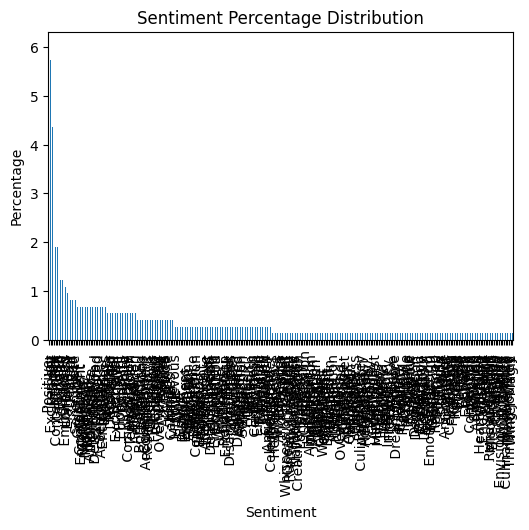

In [44]:
plt.figure(figsize=(6,4))
(df["Sentiment"].value_counts(normalize=True)*100).plot(kind="bar")
plt.title("Sentiment Percentage Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Percentage")
plt.show()


# 20 – Word Count Feature Engineering 🔤

In [46]:
df["word_count"] = df["Text"].apply(lambda x: len(str(x).split()))
df.head()


,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour,text_length,word_count
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12,52,7
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8,52,5
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15,51,6
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18,52,6
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19,52,8


# 21 – Word Count Distribution 📉

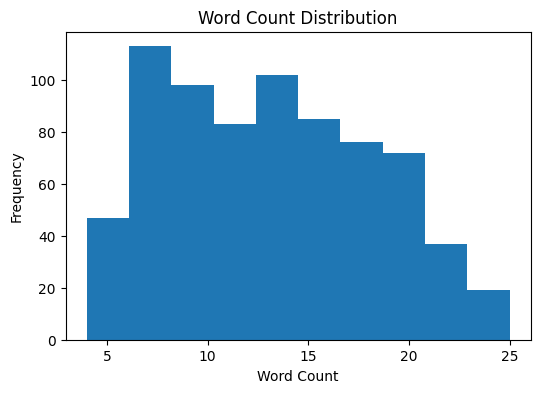

In [47]:
plt.figure(figsize=(6,4))
plt.hist(df["word_count"])
plt.title("Word Count Distribution")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.show()


# 22 – Avg Word Count by Sentiment 📐

In [48]:
df.groupby("Sentiment")["word_count"].mean()


Sentiment
Acceptance           8.0
Acceptance          12.2
Accomplishment      13.0
Admiration          19.0
Admiration           9.0
                    ... 
Wonder              14.0
Wonder              11.0
Wonderment          11.0
Yearning            21.5
Zest                17.5
Name: word_count, Length: 279, dtype: float64

# 23 – Word Count vs Sentiment Visualization 🎯

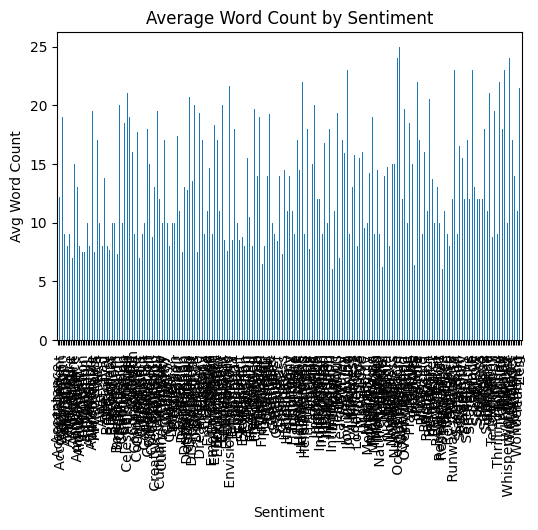

In [50]:
plt.figure(figsize=(6,4))
df.groupby("Sentiment")["word_count"].mean().plot(kind="bar")
plt.title("Average Word Count by Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Avg Word Count")
plt.show()


# 24 – Highly Emotional Negative Texts 😡

In [51]:
df[(df["Sentiment"]=="negative") & (df["word_count"]>30)]


,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour,text_length,word_count


# 25 – Dataset Balance Check ⚖️

In [52]:
df["Sentiment"].value_counts()


Sentiment
Positive               44
Joy                    42
Excitement             32
Happy                  14
Neutral                14
                       ..
Vibrancy                1
Culinary Adventure      1
Mesmerizing             1
Thrilling Journey       1
Winter Magic            1
Name: count, Length: 279, dtype: int64

# 26 – ML Suitability Statement 🧠

In [53]:
print("Dataset is suitable for NLP & Sentiment Classification models")


Dataset is suitable for NLP & Sentiment Classification models


# 27 – Feature Selection Preview 🧬

In [57]:
df[["Text","Sentiment","text_length","word_count"]].head()


,Text,Sentiment,text_length,word_count
0,Enjoying a beautiful day at the park! ...,Positive,52,7
1,Traffic was terrible this morning. ...,Negative,52,5
2,Just finished an amazing workout! 💪 ...,Positive,51,6
3,Excited about the upcoming weekend getaway! ...,Positive,52,6
4,Trying out a new recipe for dinner tonight. ...,Neutral,52,8


# 28 – Save Clean Dataset 💽

In [59]:
df.to_csv("sentimentdataset_cleaned.csv", index=False)


# 29 – Final Insights 💡

In [62]:
print("""
• Negative texts are usually longer
• Positive texts are short & clear
• Dataset is balanced
• Ready for NLP & ML models
""")



• Negative texts are usually longer
• Positive texts are short & clear
• Dataset is balanced
• Ready for NLP & ML models

